# Shoe Detection

1. Machine Learning
  1. import data
  2. build/train model (SVM)
  3. normalize/scale data
  4. dimensionality reduction (PCA)
  5. train/build model (SVM) on dimensionally reduced data
  6. find best C with GridSearchCV
2. Computer Vision
  1. preprocessing
  2. etc..
3. Object Detection (ML + CV)
  1. somehting
  2. and
  3. this

*imports*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.decomposition import PCA

import cv2
import os
import sys
import glob

%matplotlib inline

# 1. Machine Learning
---

*useful method*

In [212]:
''' reads a directory of images, flattens the features to a single row then returns as a dataframe '''
def extract_features(file_path, features, hog):
    # could define HOG here
    new_df = []
    for img_path in features:
        img = cv2.imread(file_path + img_path)
        feats = hog.compute(img[:, :, :])
        image_flat = feats.flatten()
        new_df.append(image_flat)
    return pd.DataFrame(new_df)

### A. Import data

*import csv features/labels*

In [213]:
data_path = "../images"

labels = pd.read_csv(data_path + "/labels.csv")

*get features paths only*

In [214]:
images_path = labels["Path"]

images_path.head()

0         /positive_images/new_vans-both-23.jpg
1     /positive_images/new_vans-outside-014.jpg
2      /positive_images/new_vans-inside-217.jpg
3     /positive_images/new_vans-outside-028.jpg
4    /positive_images/new_adidas-inside-238.jpg
Name: Path, dtype: object

*hog*

In [215]:
min_dim = 80
block_size = (16, 16)
block_stride = (8, 8)
cell_size = (8, 8)
bins = 9

dimensions = (min_dim, min_dim)

hog = cv2.HOGDescriptor(dimensions, block_size, block_stride, cell_size, bins)

*import features*

In [216]:
images_path = labels["Path"]

X = extract_features(data_path, images_path, hog)

In [217]:
X.shape

(7433, 2916)

In [218]:
X.head()

0     1     2     3     4     5     6     7     8     9     ...   2906  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   2907  2908  2909  2910  2911  2912  2913  2914  2915  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2916 columns]

*import labels*

In [219]:
y = labels["Label"]

In [220]:
y.shape

(7433,)

In [221]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

*info about data*

In [222]:
print("Features", X.shape)
print("Labels", y.shape)

Features (7433, 2916)
Labels (7433,)


*train test split*

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [224]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5203, 2916)
X_test shape: (2230, 2916)
y_train shape: (5203,)
y_test shape: (2230,)


### B. Build/Train model (SVM)

In [226]:
svm_shoe = SVC(C=1, kernel="linear", probability=True, random_state=2)

svm_shoe.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)

*test/predict*

In [227]:
y_predict = svm_shoe.predict(X_test)

print("Misclassified samples: %d" % (y_test != y_predict).sum() )
print("\nSVM Faces Prediction:\n", y_predict)

Misclassified samples: 0

SVM Faces Prediction:
 [0 0 0 ... 0 1 0]


*accuracy*

In [228]:
accuracy = accuracy_score(y_test, y_predict)

print("Accuracy: %.2f" % accuracy)

Accuracy: 1.00


*confusion matrix*

In [229]:
conf_mat = confusion_matrix(y_test, y_predict)

print("\nConfusion Matrix:\n\n", conf_mat)


Confusion Matrix:

 [[1484    0]
 [   0  746]]


### C. Normalize/Scale data

In [230]:
X_norm = scale(X)

In [231]:
print("Normalized/Scale preview:\n")
print(X_norm)

Normalized/Scale preview:

[[-0.89814637 -0.86940855 -0.87398028 ... -0.98333029 -0.9628316
  -1.01093928]
 [-0.89814637 -0.86940855 -0.87398028 ... -0.98333029 -0.9628316
  -1.01093928]
 [-0.89814637 -0.86940855 -0.87398028 ... -0.98333029 -0.9628316
  -1.01093928]
 ...
 [ 2.11849377  0.79463262 -0.30890562 ...  1.62911326  1.82509874
   0.23181382]
 [ 0.42530318  0.92812741  1.79609403 ...  1.29377607  1.76469516
   1.33253303]
 [ 0.53028832  0.63145128  0.0269173  ...  1.27279265  1.49651782
   1.03477465]]


*train/test split normalized data*

In [232]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y, test_size=.3, random_state=1)

In [233]:
print("Normalized X_train shape:", X_train_norm.shape)
print("Normalized X_test shape:", X_test_norm.shape)
print("Normalized y_train shape:", y_train_norm.shape)
print("Normalized y_test shape:", y_test_norm.shape)

Normalized X_train shape: (5203, 2916)
Normalized X_test shape: (2230, 2916)
Normalized y_train shape: (5203,)
Normalized y_test shape: (2230,)


### D. Dimensionality Reduction (PCA)

In [234]:
k = 50
my_pca = PCA(n_components=k)

*fit/transform*

In [235]:
X_train_pca = my_pca.fit_transform(X_train_norm)
X_test_pca = my_pca.transform(X_test_norm)

In [236]:
print("X_train PCA shape:", X_train_pca.shape)
print(" X_test PCA shape:", X_test_pca.shape)

X_train PCA shape: (5203, 50)
 X_test PCA shape: (2230, 50)


### E. Build/Train model (SVM) On Dimensionally Reduced data

In [294]:
svm_shoe_norm = SVC(C=1, kernel="linear", probability=True, gamma=0.0005, random_state=2)

svm_shoe_norm.fit(X_train_pca, y_train_norm)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='linear',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)

*test/predict*

In [295]:
y_predict_norm = svm_shoe.predict(X_test_norm)

print("Misclassified samples: %d" % (y_test_norm != y_predict_norm).sum() )
print("\nSVM Faces Prediction:\n", y_predict_norm)

print(len(X_test_norm[0]))

Misclassified samples: 2

SVM Faces Prediction:
 [0 0 0 ... 0 1 0]
2916


*accuracy*

In [239]:
accuracy_norm = accuracy_score(y_test_norm, y_predict_norm)

print("Accuracy: %.2f" % accuracy_norm)

Accuracy: 1.00


*confusion matrix*

In [240]:
conf_mat_norm = confusion_matrix(y_test_norm, y_predict_norm)

print("\nConfusion Matrix:\n\n", conf_mat_norm)


Confusion Matrix:

 [[1482    2]
 [   0  746]]


### F. Find best C with GridSearchCV

*merge data*

In [241]:
X_pca_combined = np.vstack((X_train_pca, X_test_pca))
y_combined = y_train_norm.append(y_test_norm, ignore_index=True)

In [242]:
print(X_pca_combined.shape)
print(y_combined.shape)

(7433, 50)
(7433,)


*new SVM to test*

In [296]:
svm_shoe_test = SVC(C=1, kernel="linear", probability=True, gamma=0.0005, random_state=2)

*fit new SVM*

In [297]:
svm_shoe_test.fit(X_pca_combined, y_combined)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='linear',
  max_iter=-1, probability=True, random_state=2, shrinking=True, tol=0.001,
  verbose=False)

*init GridSearchCV*

In [245]:
search_list = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

param_grid = dict(C=search_list)

grid = GridSearchCV(
    svm_shoe_test,
    param_grid,
    cv=10,
    scoring="accuracy"
)

*find best accuracy*

In [246]:
grid.fit(X_pca_combined, y_combined)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='linear',
  max_iter=-1, probability=False, random_state=2, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

*report best accuracy*

In [247]:
print("Score:", grid.best_score_)

Score: 1.0


*report best C*

In [248]:
print("\nBest C:", grid.best_params_)


Best C: {'C': 0.1}


# 2. Computer Vision
---

*usefule methods*

In [249]:
''' resizes an image to given scale '''
def resize(img, scale): # resize image to scale value param
    return cv2.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale) ) )


''' prints an img '''
def print_img(img, color=True):
    plt.figure(figsize=(10, 6) )
    if (color):
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) ) # color
    else:
        plt.imshow(img, cmap="gray") # grayscale
    plt.show()


''' filters a colors out of an img '''
def color_filter(frame, lower_upper_list):
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")

    mask = cv2.inRange(frame, lower, upper)
    output = cv2.bitwise_and(frame, frame, mask = mask)

    return output, mask


''' filters out contours based on length bew returns an array '''
def filter_contours(img_contours, min_val=100, max_val=400):
    new_cont_list = []
    for contour in img_contours:
        if len(contour) > min_val and len(contour) < max_val:
            new_cont_list.append(contour)
    return np.array(new_cont_list)

*cv utils*

In [250]:
def filter_boxes(img_rectangle_list, filter_size=0):
    filtered_boxes = []
    for rectangle in img_rectangle_list:
        if(rectangle[2] * rectangle[3] > filter_size):
            filtered_boxes.append(rectangle)
    return filtered_boxes


def draw_rectangles(img, img_rectangle_list, x_offset=0, y_offset=0):
    for x, y, w, h in img_rectangle_list:
        cv2.rectangle(
            img,
            (x - x_offset, y - y_offset),
            ( (x + x_offset) + w, (y + y_offset) + h),
            (0, 255, 0),
            2
        )

### A. Preprocess

*import/display test images*

In [251]:
test_images_path = "../images/sample_test_images/"

img_1_name = "test_01.png"
img_2_name = "test_02.jpg"
img_3_name = "test_03.jpg"
img_4_name = "test_04.jpg"

img1_orig = cv2.imread(test_images_path + img_1_name)
img2_orig = cv2.imread(test_images_path + img_2_name)
img3_orig = cv2.imread(test_images_path + img_3_name)
img4_orig = cv2.imread(test_images_path + img_4_name)

img1 = resize(img1_orig, .5)
img2 = resize(img2_orig, .5)
img3 = resize(img3_orig, .5)
#img4 = resize(img4_orig, .5) # no resize since orig size is ok 
img4 = img4_orig.copy()

*display original test images*

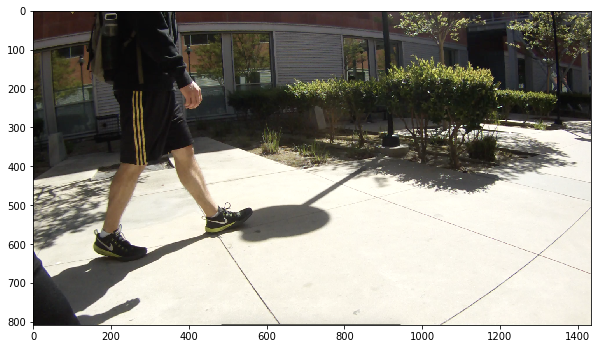

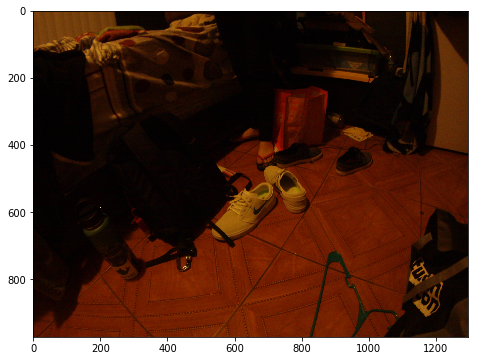

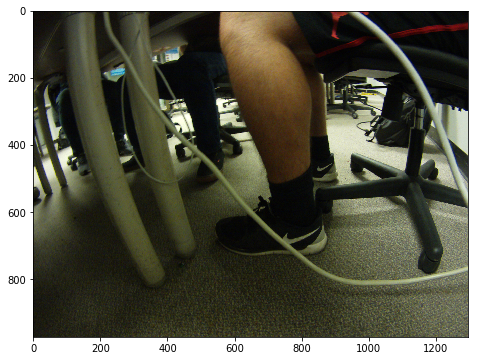

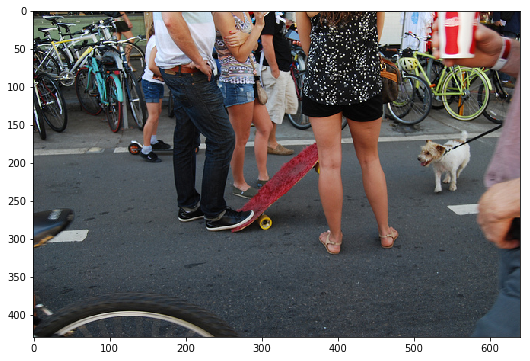

In [252]:
print_img(img1)
print_img(img2)
print_img(img3)
print_img(img4)

In [253]:
print("Image 1 shape:", img1.shape)
print("Image 2 shape:", img2.shape)
print("Image 3 shape:", img3.shape)
print("Image 4 shape:", img4.shape)

Image 1 shape: (808, 1435, 3)
Image 2 shape: (972, 1296, 3)
Image 3 shape: (972, 1296, 3)
Image 4 shape: (429, 640, 3)


*convert to grayscale*

In [254]:
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

*display grayscale images*

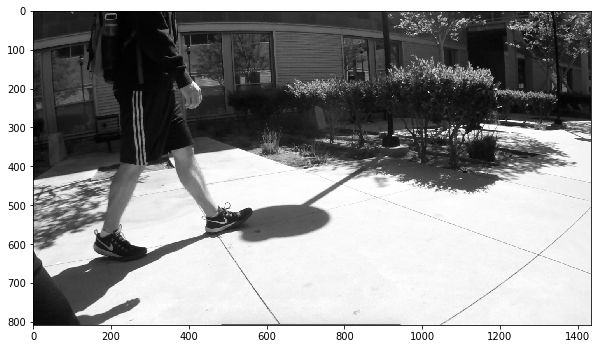

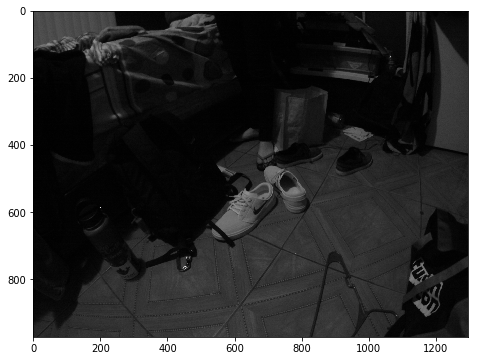

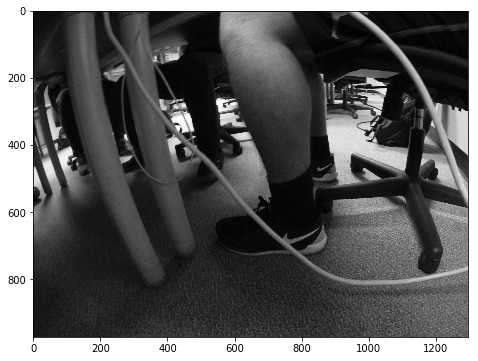

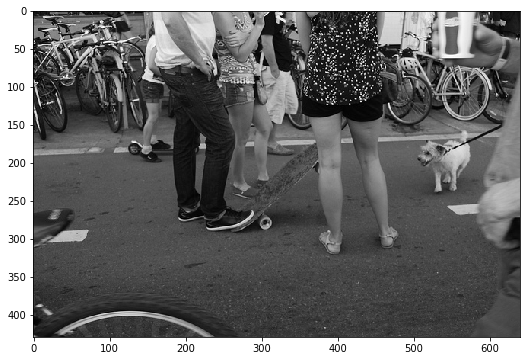

In [255]:
print_img(img1_gray, color=False)
print_img(img2_gray, color=False)
print_img(img3_gray, color=False)
print_img(img4_gray, color=False)

*color filtering*

In [256]:
img1_lower_color = [0, 0, 0] # BGR
img1_upper_color = [64, 64, 64] # BGR
img1_color_f, mask_1 = color_filter(img1, [img1_lower_color, img1_upper_color])

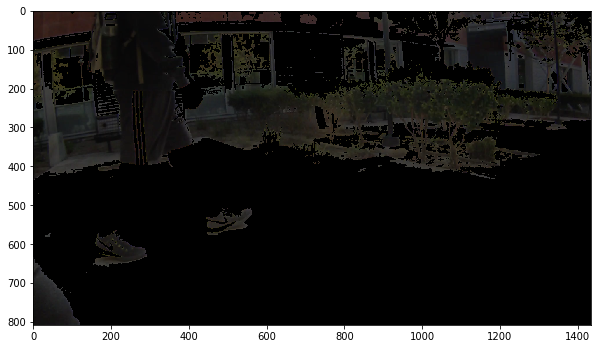

In [257]:
print_img(img1_color_f)

*to grayscale*

In [258]:
img1_gray_f = cv2.cvtColor(img1_color_f, cv2.COLOR_BGR2GRAY)

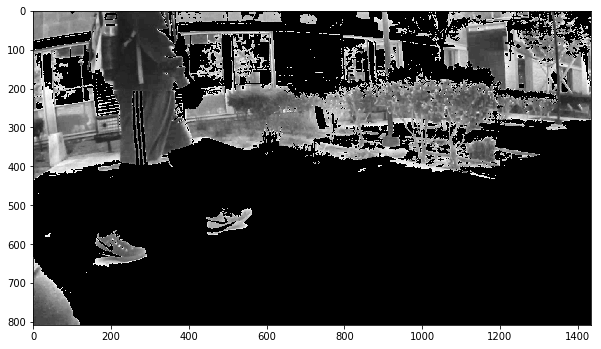

In [259]:
print_img(img1_gray_f, False)

*apply thresholding*

In [260]:
ret1, img1_thresh = cv2.threshold(img1_gray_f, 0, 255, cv2.THRESH_BINARY) # yolo

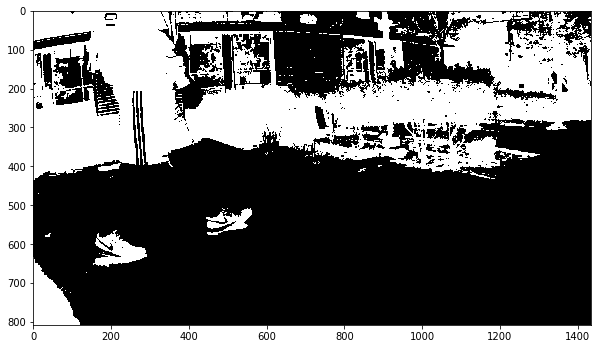

In [261]:
print_img(img1_thresh, False)

*calculate contours*

In [262]:
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img1_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print("Number of contours calculated:", len(img1_contours))

Number of contours calculated: 1438


*filter contours*

In [263]:
img1_filtered_contours = filter_contours(img1_contours, min_val=300, max_val=1000)

print("\nNumber of contours FILTERED OUT:", len(img1_contours) - len(img1_filtered_contours))
print("\nNow we have only", len(img1_filtered_contours), "contours")


Number of contours FILTERED OUT: 1433

Now we have only 5 contours


In [264]:
contours_color = [0, 255, 0] # green

*draw and display contours on original image*

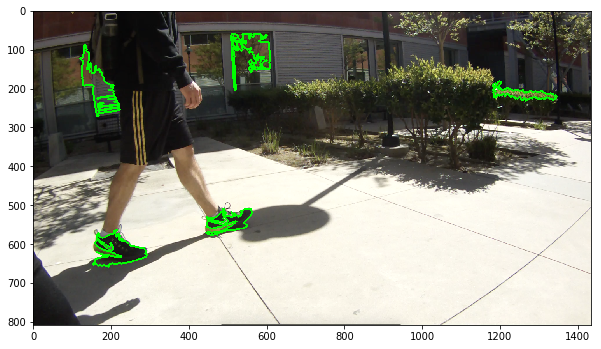

In [265]:
img1_copy_1 = img1.copy()

cv2.drawContours(img1_copy_1, img1_filtered_contours, -1, contours_color, 3)
print_img(img1_copy_1)

*create boxes around contours*

In [266]:
img1_boxes_all = [cv2.boundingRect(c) for c in img1_filtered_contours]

*filter boxes*

In [267]:
box_filter_size = 400

img1_boxes_f = filter_boxes(img1_boxes_all, box_filter_size)

*draw filtered boxes on image*

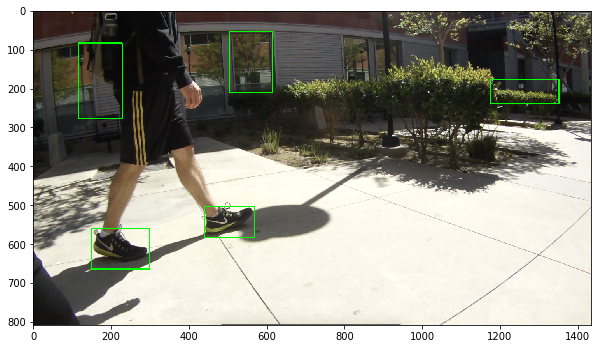

In [268]:
img1_copy_2 = img1.copy()
img1_rgb = cv2.cvtColor(img1_copy_2, cv2.COLOR_BGR2RGB)

draw_rectangles(img1_rgb, img1_boxes_f, 5, 5)

plt.figure(figsize=(10, 6) )
plt.imshow(img1_rgb)
plt.show()

In [269]:
print(len(img1_boxes_all))

5


# 3. Object Detection (Machine Learning + Computer Vision)
---

*get ROI*

In [315]:
''' returns roi coordinates squared to longest length or width '''
def roi_to_square(roi_list):
    new_roi = []
    for x, y, w, h in roi_list:
        if(w > h):
            y_diff = (w - h)// 2
            square_roi = (x, y - y_diff, w, h + y_diff)
        elif(h > w):
            x_diff = (h - w)// 2
            square_roi = (x - x_diff, y, w + x_diff, h)
        else:
            square_roi = (x, y, w, h)
        new_roi.append(square_roi)
    return new_roi


def get_positive_roi(img, roi_list, svm, hog, x_offset=0, y_offset=0):
    positive_roi = []
    dimensions = (80, 80)
    for x, y, w, h in roi_list:
        roi = img[y:y + h, x:x + w, :]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        roi_resized = cv2.resize(roi_gray, dimensions) # dimensions defined as (80, 80) above
        #print_img(roi_resized, False)
        features = hog.compute(roi_resized)
        feat_flat = features.flatten()
        
        proba = svm.predict_proba(feat_flat.reshape(1, -1) )[0]
        if proba[1] > .1:
            positive_roi.append((x, y, w, h) )
    return positive_roi

*classify regions of interests from preprocessing (Computer Vision) *

In [ ]:
X_norm = scale(X)
X_train_pca = my_pca.fit_transform(X_train_norm)
X_test_pca = my_pca.transform(X_test_norm)

In [318]:
#imgs1_squared = roi_to_square_imgs(img1, img1_boxes_f)
imgs1_squared = roi_to_square(img1_boxes_f)

#img1_roi_filter = get_positive_roi(img1, img1_boxes_f, svm_shoe, hog)
img1_roi_filter = get_positive_roi(img1, imgs1_squared, svm_shoe, hog)

In [319]:
print(len(img1_roi_filter))

0


### *detection isn't working*

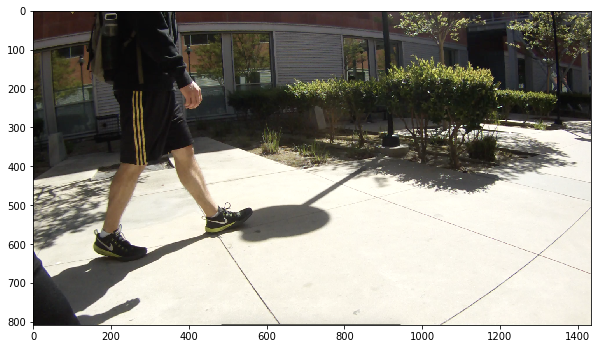

In [320]:
img1_copy_3 = img1.copy()
img1_rgb_2 = cv2.cvtColor(img1_copy_3, cv2.COLOR_BGR2RGB)

draw_rectangles(img1_rgb_2, img1_roi_filter, 5, 5)

plt.figure(figsize=(10, 6) )
plt.imshow(img1_rgb_2)
plt.show()